# Python for Data & Analytics - Lesson 5 
# Object Oriented Programming - Part 1
# Managing Environments with Anaconda 
## Lesson 5 Homework Solution

In [1]:
# Write a recursive function that receives an integer N and returns the Nth number in the Fibonacci Sequence.

def fibonacci(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fibonacci(n - 1) + fibonacci(n - 2)
    
fibonacci(10)

55

In [2]:
# In the function my_iterative_sort(), time separately operations that are performed inside and outside the inner loop.

from time import time

def my_iterative_sort(unsorted_list):
    sorted_list = []
    inner_loop_time = 0
    outer_loop_time = 0
    # As long as there are unsorted items, find the minimum unsorted value and move it to the sorted list
    while len(unsorted_list) > 0: 
        stop_1 = time() # start time of an outer loop iteration
        min_num = float("inf")
        stop_2 = time() # start time of an inner loop run
        for num in unsorted_list:
            if num < min_num:
                min_num = num
        stop_3 = time() # end time of an inner loop run
        sorted_list.append(min_num)
        del unsorted_list[unsorted_list.index(min_num)]
        stop_4 = time() # end time of an outer loop iteration
        inner_loop_time += (stop_3 - stop_2) 
        outer_loop_time += (stop_2 - stop_1 + stop_4 - stop_3)
    return sorted_list, inner_loop_time, outer_loop_time

In [3]:
from random import shuffle
import numpy as np

Ns = np.linspace(0, 10000, 21)
inner_loop_times = []
outer_loop_times = []

for i, n in enumerate(Ns): # enumerate() is a useful function that returns a counter and an item from a list
    my_list = list(range(int(n)))
    shuffle(my_list)
    _, inner_loop_time, outer_loop_time = my_iterative_sort(my_list)
    inner_loop_times.append(inner_loop_time)
    outer_loop_times.append(outer_loop_time)
    
Ns[:5], outer_loop_times[:5], inner_loop_times[:5]

(array([   0.,  500., 1000., 1500., 2000.]),
 [0,
  0.0019626617431640625,
  0.002026796340942383,
  0.013034582138061523,
  0.024085044860839844],
 [0,
  0.005017518997192383,
  0.029883861541748047,
  0.05375218391418457,
  0.10860562324523926])

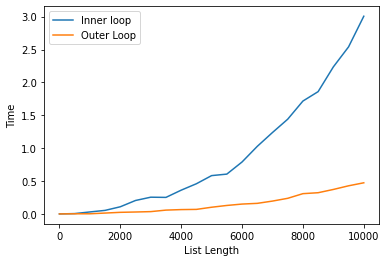

In [4]:
# Does the plot fit your expectatiopns? What is the Big O in time of the outer loop and the inner loop?
import matplotlib.pyplot as plt

_ = plt.plot(Ns, inner_loop_times, 
             Ns, outer_loop_times)
plt.ylabel('Time')
plt.xlabel('List Length')
plt.legend(('Inner loop', 'Outer Loop'))

## Object Oriented Programming
[Object-oriented Programming](https://en.wikipedia.org/wiki/Object-oriented_programming) (OOP) is a programming paradigm that has programs structured so that properties and behaviors are bundled into individual objects. 

**Objects** are bundles of related attributes and behaviors that are designated by a name. 

**Classes** are the definitions for the data format and available procedures for a given type of objects. An objectis an instance of a class.

In [5]:
import matplotlib.image as mpimg
%pylab inline


# Here is how we define a class.
class dog:
     # Class Attribute
    species = 'Canis Lupus'

    # Initializer / Instance Attributes. 
    # The __init__ method is called the "constructor" of the class. It is run when a new object of the class is instantiated.
    def __init__(self, name, img=None, favorite_food=None):
        self.name = name
        self.img = img
        self.favorite_food = favorite_food
        
    def bark(self):
        print('Woof!')
    
    def come(self, call):
        if self.name.lower() in call.lower(): # Is the dog's name part of the call?
            img = mpimg.imread(self.img )
            imgplot = plt.imshow(img)
            plt.axis('off') 
            plt.show()
    
    def eat(self):
        print('Give us some food!')
        food = input() # Get user input
        print('\nEating the %s.' % food)
        if food == self.favorite_food:
            print('Yummy, I love it!')
            
    def set_favorite_food(self):
        print('What is the new favorite food')
        food = input() # Get user input
        self.favorite_food = food
           
    def get_name(self):
        return self.name

Populating the interactive namespace from numpy and matplotlib


c:\users\tyifat\appdata\local\continuum\anaconda3\envs\idf-3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['shuffle', 'time']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
snoop = dog('Snoopy', img='Snoopy.png', favorite_food='peanuts')

In [7]:
snoop.set_favorite_food()
snoop.eat()

What is the new favorite food
cheese
Give us some food!
more cheese

Eating the more cheese.


In [8]:
snoop.bark()

Woof!


In [9]:
snoop.come('Come here!')

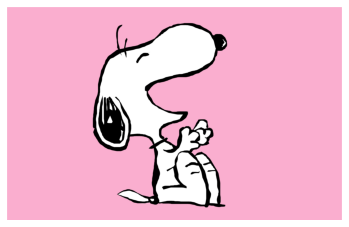

In [10]:
snoop.come('Come here, Snoopy!')

In [11]:
snoop.eat()

Give us some food!


Eating the .


In [12]:
cash = dog('Cash', img='cash.png', favorite_food='yogurt')

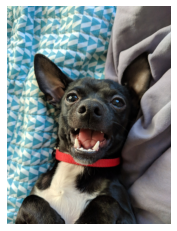

In [13]:
cash.come('Cashy, come!')

In [14]:
dog.species

'Canis Lupus'

In [15]:
cash.favorite_food = 'slippers'
cash.favorite_food

'slippers'

In [16]:
# We've been using classes objects all along. Take for example str
a = 'hey there!'

# we can use the tab after we type"a." to get a list of avilable string methods


In [17]:
# str also has the attribute __class_
a.__class__

str

### Object life cycle
Objects are created, used and discarded. We have special methods that are called at key moments.
* The constructor (```__init__```) is called when a new object is created. Memory is then allocated to store the instance.
* The destructor (```__del__```) is called when an abject is discarded. The memory that was used to store the instance is released.

In [19]:
class example:
    def __init__(self):
        print('I am constructed!')
    
    def __del__(self):
        print('I am destructed!')

In [23]:
ex1 = example()

I am constructed!


In [21]:
ex1 = 'I am an example'

I am destructed!


In [24]:
ex1

# Encapsulation
Encapsulation is an OOP principle stating that related data and methods that operate on these data should be bundled together as an object. A related principle is **Data Hiding** - stating that implementation details of a class should be hidden from outside code, and a clear and simple interface should be presented for those who want to use the class. The advantages of this approach:
* Increased usability.
* Users not having to worry about the implementation of the modules they use eliminates errors.
* These principles support modular software development and allow us to update part of a program without needing to make large-scale changes to the entire program. 


Some languages provide mechanisms for blocking outside access from outside the class. Python, by contrast, relies on the principle "we're all adults here", and uses conventions to protect private attributes from outside access.

In [ ]:
# Weakly private attributes start with a single underscore

In [25]:
class secret_keeper:
    _secret = None
    
    def __init__(self, password):
        self._password = password
        
    def keep_secret(self, secret):
        self._secret = secret
        
    def tell_secret(self, password):
        if password == self._password:
            print(self._secret)
        else:
            print('I cannot tell you!')

In [27]:
keeper = secret_keeper('snoopy123')

In [28]:
keeper.keep_secret('I love Python!')

In [32]:
keeper.tell_secret('snoopy123e')

I cannot tell you!


In [30]:
# But if we really want to, we can access the secret directly.
print(keeper._secret)

I love Python!


In [33]:
# Strongly private attributes start with a double underscore. They are then "mangled" and can only be accesses using
# _class__attribute
class A:
    __b = "I'm hiding"
    
a = A()
a.__b

AttributeError: 'A' object has no attribute '__b'

In [34]:
a._A__b

"I'm hiding"

### The power of OOP
Object oriented programming is really useful for developing complex software with multiple realtionships between different entities. The modular structure supports code reuse and allows to devide complex programs into modules that are developed by different programmers/teams. As long as the interfaces and relationships between classes are well defined, one developer doens't need to worry about the implememntation of a module by somebody else. OOP takes to the next level the advantages of modularity and code reuse that we reviewed with functions: efficiency; readablity, ease of maintenance. 

### Composition
Building complex classes that have other classes in them as variables. 

In [35]:
class dog_pack():
    dogs = []
    
    def add_dog(self, doggy):
        self.dogs.append(doggy)
        
    def gather_pack(self):
        for d in self.dogs:
            print(d.get_name(), 'is here.')
            d.come(d.get_name())

Cash is here.


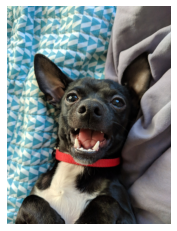

Snoopy is here.


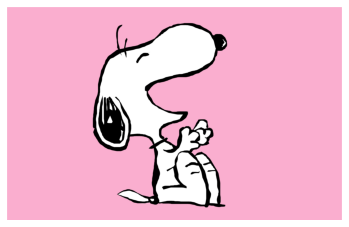

In [36]:
my_pack = dog_pack()
my_pack.add_dog(cash)
my_pack.add_dog(snoop)
my_pack.gather_pack()

## Homework
Questions 1 and 2 are adopted from [realpython.ocm](https://realpython.com/python3-object-oriented-programming/).

1. Add an instance attribute ```is_hungry``` to the ```dog``` class. ```is_hungry = True``` when an instance is created and changes to ```False``` when a dog eats. 

2. Add to the method gather_pack of the class dog_pack functionality that checks whether the dogs in the pack are hungry. If all the dogs are hungry print "My dogs are hungrey." If none is hungry print "My dogs are not hungry".

3. Write a ```cat``` class with at least two attributes and two methods.

4. Write a ```meet()``` function that recieves two arguments ```animal_1``` and ```animal_2```. Define three different behaviors depending on whether the animals are two cats, two dogs, or a dog and a cat. *Tip*: check out the function [```isinstance```](https://www.programiz.com/python-programming/methods/built-in/isinstance).